## Question 2  

### Tahir Manuel D'Mello

In [1]:
import pandas as pd
import plotnine as p9
import random
import numpy as np
import time
import warnings
from math import radians, cos, sin, asin, sqrt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
#Taken from StackOverflow Link provided in assignment and modified a little 

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [3]:
data_full = pd.read_csv("worldcities.csv")

In [4]:
data_full

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [5]:
df = data_full[['city', 'lat', 'lng']]
df

,city,lat,lng
0,Tokyo,35.6839,139.7744
1,Jakarta,-6.2146,106.8451
2,Delhi,28.6667,77.2167
3,Manila,14.6000,120.9833
4,São Paulo,-23.5504,-46.6339
...,...,...,...
42900,Tukchi,57.3670,139.5000
42901,Numto,63.6667,71.3333
42902,Nord,81.7166,-17.8000
42903,Timmiarmiut,62.5333,-42.2167


Modify the k-means code (or write your own) from slides8 to use the Haversine metric and work with our dataset. **(5 points)**

In [6]:
def k_means_haversine(k, df, plot_d):
    
    pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]

    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, [] # arbitrary but different


    while cluster_ids != old_cluster_ids:

        old_cluster_ids = list(cluster_ids)
        cluster_ids = []

        for pt in pts:

            min_cluster = -1
            min_dist = float('inf')

            for i, center in enumerate(centers):

                dist = haversine(pt[0], pt[1], center[0], center[1])

                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist

            cluster_ids.append(min_cluster)   

        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match] for match in range(k)]

        centroids = [sum(pts)/len(pts) for pts in cluster_pts]
    
    df_out = df.assign(cluster=cluster_ids)
    
    if plot_d == True: 
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
        ax.coastlines()

        for i in range(k):
            lats = df_out[df_out['cluster'] == i]['lat']
            lngs = df_out[df_out['cluster'] == i]['lng']
            col = (np.random.random(), np.random.random(), np.random.random())
            ax.plot(lngs, lats, ",", color=col, transform=ccrs.PlateCarree())

        ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
        plt.show()
    
    return df_out

Visualize your results with a color-coded scatter plot. **(5 points)**  
Be sure to use an appropriate map projection (i.e. do not simply make x=longitude and y=latitude). **(5 points)**

C:\Users\tahir\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
C:\Users\tahir\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
C:\Users\tahir\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.


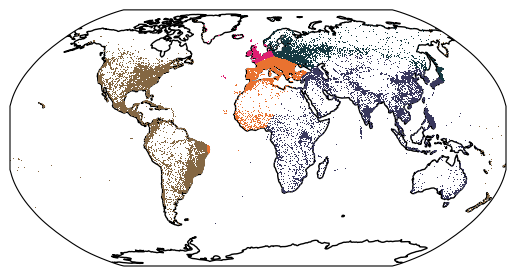

,city,lat,lng,cluster
0,Tokyo,35.6839,139.7744,0
1,Jakarta,-6.2146,106.8451,0
2,Delhi,28.6667,77.2167,0
3,Manila,14.6000,120.9833,0
4,São Paulo,-23.5504,-46.6339,1
...,...,...,...,...
42900,Tukchi,57.3670,139.5000,4
42901,Numto,63.6667,71.3333,4
42902,Nord,81.7166,-17.8000,4
42903,Timmiarmiut,62.5333,-42.2167,2


In [7]:
df_out = k_means_haversine(5, df, True)
df_out

Use this algorithm to cluster the cities data for k=5, 7, and 15. Run it several times to get a sense of the variation of clusters for each k (share your plots). **(5 points)**

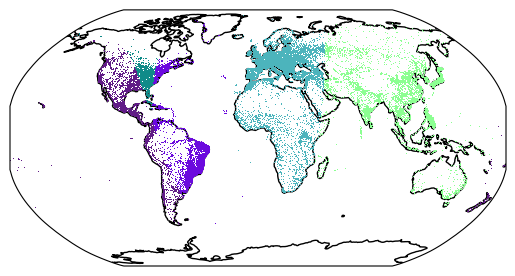

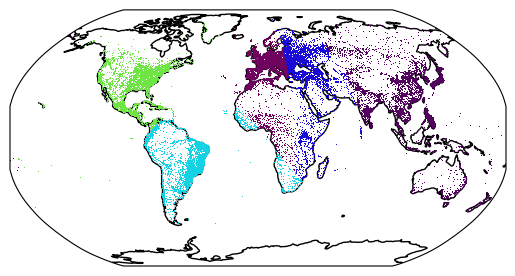

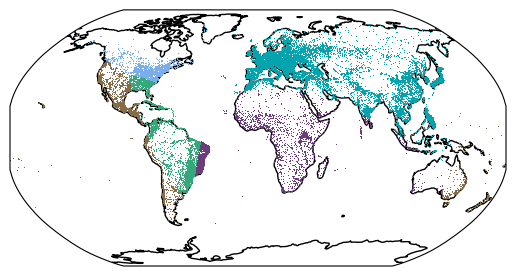

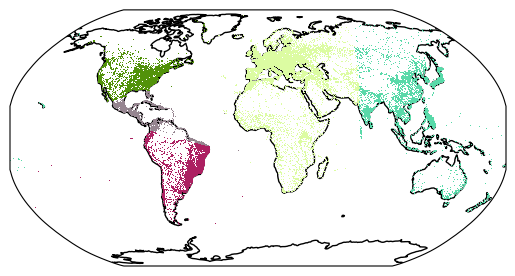

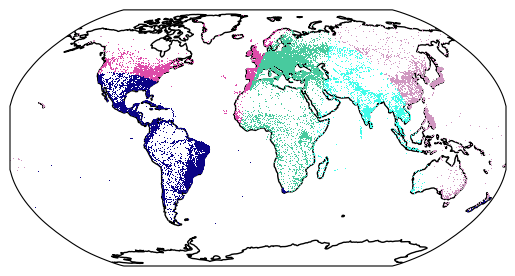

The average run time for k = 5 clustering and plotting is 2.0968576799999994 seconds.


In [8]:
time_set_5 = []
warnings.filterwarnings("ignore")

for i in range(5):
    t_start = time.perf_counter()
    
    df_out = k_means_haversine(5, df, True)
    
    t_end = time.perf_counter()
    
    time_set_5.append(t_end-t_start)
    

print("The average run time for k = 5 clustering and plotting is", np.mean(np.array(time_set_5)), "seconds.")


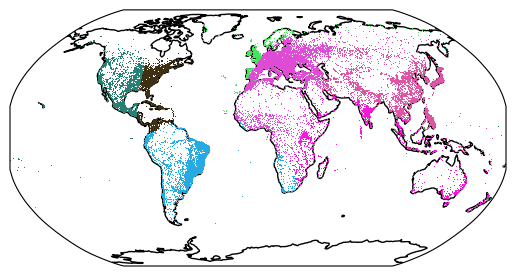

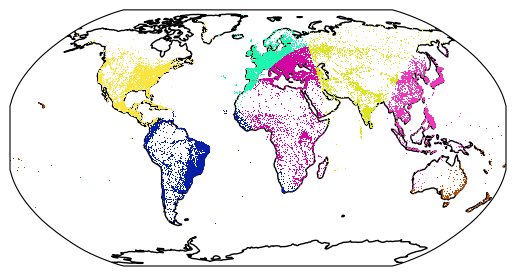

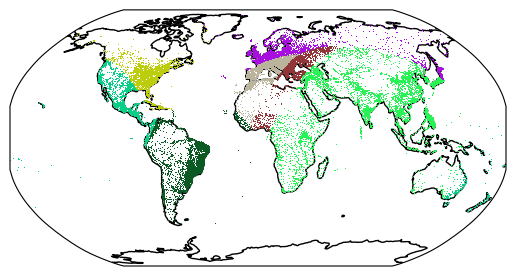

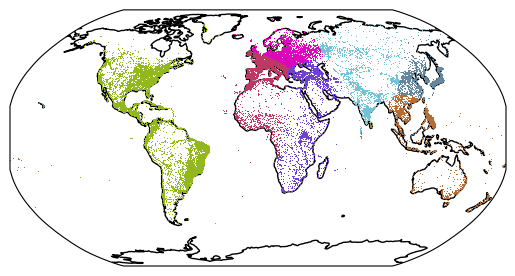

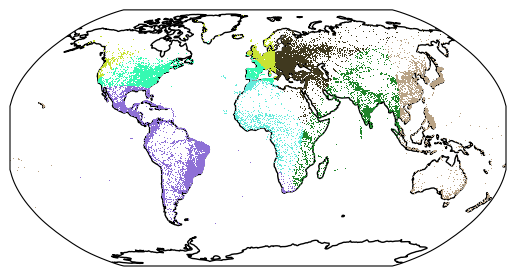

The average run time for k = 7 clustering and plotting is 2.377253739999998 seconds.


In [9]:
time_set_7 = []

for i in range(5):
    t_start = time.perf_counter()
    
    df_out = k_means_haversine(7, df, True)
    
    t_end = time.perf_counter()
    
    time_set_7.append(t_end-t_start)
    
print("The average run time for k = 7 clustering and plotting is", np.mean(np.array(time_set_7)), "seconds.")


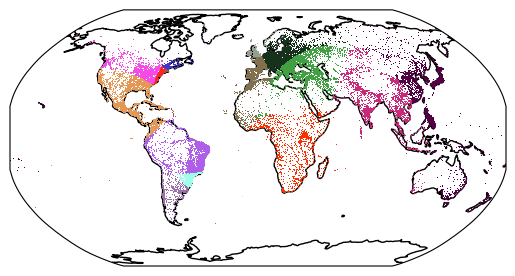

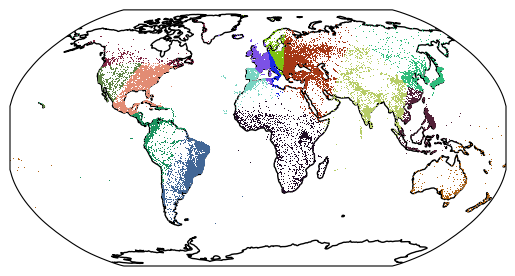

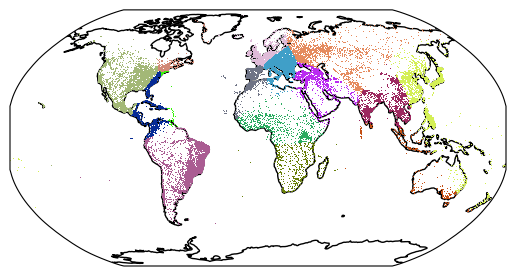

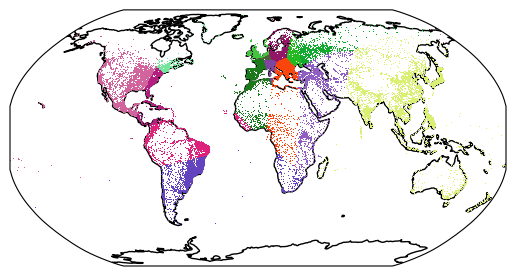

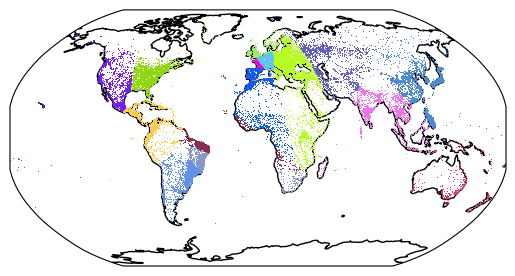

The average run time for k = 15 clustering and plotting is 3.4952057800000005 seconds.


In [10]:
time_set_15 = []

for i in range(5):
    t_start = time.perf_counter()
    
    df_out = k_means_haversine(15, df, True)
    
    t_end = time.perf_counter()
    
    time_set_15.append(t_end-t_start)
    
print("The average run time for k = 15 clustering and plotting is", np.mean(np.array(time_set_15)), "seconds.")


Comment briefly on the diversity of results for each k. **(5 points)**

At the start of each clustering process, the first set of centroids are picked at random from the points to cluster.  
This introduces diversty between every run of the k-means algorithm for the same k.  
  
Additoinally, having differnt k values means that there are different number of clusters.  
This introduces diversity in results between clusters of different k values.  
  
Smaller values of k result in bigger clusters and vice-versa.  
These bigger clusters fill bigger spaces on the map and appear distinctly different as compared to smaller clusters made by larger values of k. 